# CNN for CIC-CSE-IDS2018 Dataset

In [175]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
data = pd.read_csv("undersampled_cic.csv")

In [150]:
# We will create an additional 1 features which will just contain zeros as this will result in 80 features which we
# Can transform into 10X8 square input 
data["additional"]= 0 
data.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,protocol__0,protocol__6,protocol__17,target,additional
0,551,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0,3,0
1,112638867,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,5.631943e+07,1679.378605,56320621.0,56318246.0,1,0,0,3,0
2,8966,3,4,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0,5,0
3,111816159,17,23,2872.0,1709.0,1460.0,0.0,168.941176,474.948217,428.0,...,63064.0,9.999056e+06,23491.769152,10014914.0,9952970.0,0,1,0,0,0
4,369756,22,22,1976.0,2665.0,640.0,0.0,89.818182,138.033687,976.0,...,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0,1,0


In [151]:
X = data.drop("target",axis=1).values
y = data["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = data["target"])

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [152]:
X_train = X_train.reshape(4545,10,8,1) #reshaping into 10x8 input images 
X_test = X_test.reshape(1948,10,8,1) #reshaping into 10x8 input images 

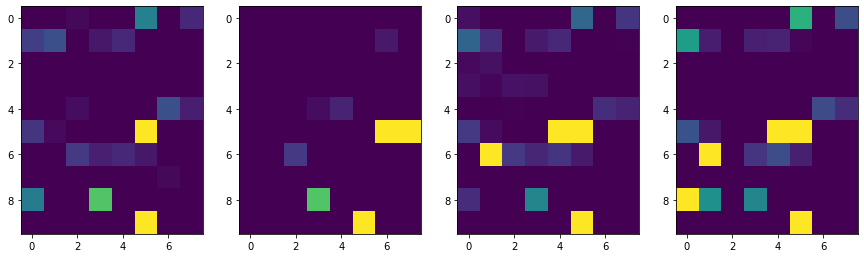

In [153]:
fig, axs = plt.subplots(nrows =1 , ncols =4, figsize= (15,6))
axs[0].imshow(X_train[0])
axs[1].imshow(X_train[1])
axs[2].imshow(X_train[2])
axs[3].imshow(X_train[9])
plt.show()

In [186]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(2,2), input_shape=(10,8,1), padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=(10,8,1), padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

# OUTPUT LAYER - equal to number of classes 
model.add(Dense(7,activation = "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [187]:
model.fit(X_train, y_cat_train, epochs = 50, batch_size = 128, validation_data = (X_test, y_cat_test))

Epoch 1/50
12/36 [=========>....................] - ETA: 0s - loss: 1.9396 - accuracy: 0.1634

2021-08-17 10:48:27.907531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 14ms/step - loss: 1.9093 - accuracy: 0.2383 - val_loss: 1.8580 - val_accuracy: 0.2941
Epoch 2/50
 7/36 [====>.........................] - ETA: 0s - loss: 1.8497 - accuracy: 0.3337

2021-08-17 10:48:28.340144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 0s 12ms/step - loss: 1.7767 - accuracy: 0.4112 - val_loss: 1.6667 - val_accuracy: 0.4286
Epoch 3/50
36/36 [==============================] - 0s 12ms/step - loss: 1.5455 - accuracy: 0.4073 - val_loss: 1.4262 - val_accuracy: 0.4050
Epoch 4/50
36/36 [==============================] - 0s 13ms/step - loss: 1.3384 - accuracy: 0.4634 - val_loss: 1.2718 - val_accuracy: 0.5113
Epoch 5/50
36/36 [==============================] - 0s 13ms/step - loss: 1.2038 - accuracy: 0.5054 - val_loss: 1.1408 - val_accuracy: 0.5118
Epoch 6/50
36/36 [==============================] - 0s 13ms/step - loss: 1.0897 - accuracy: 0.5897 - val_loss: 1.0348 - val_accuracy: 0.6247
Epoch 7/50
36/36 [==============================] - 0s 13ms/step - loss: 0.9797 - accuracy: 0.6504 - val_loss: 0.9220 - val_accuracy: 0.6843
Epoch 8/50
36/36 [==============================] - 0s 13ms/step - loss: 0.8771 - accuracy: 0.6937 - val_loss: 0.8198 - val_accuracy: 0.6997
Epoch 9/50
36/36 [======

In [188]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

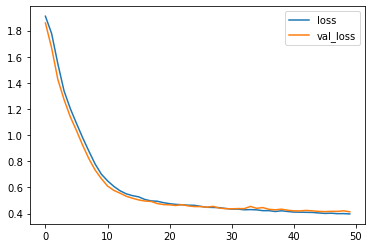

In [189]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

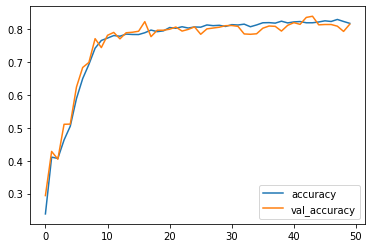

In [190]:
metrics[["accuracy","val_accuracy"]].plot()

In [191]:
predictions = np.argmax(model.predict(X_test), axis=-1)

2021-08-17 10:50:25.573068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [192]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       278
           1       1.00      1.00      1.00       278
           2       0.98      1.00      0.99       278
           3       0.86      0.68      0.76       278
           4       0.59      0.61      0.60       279
           5       0.68      1.00      0.81       279
           6       0.99      0.97      0.98       278

    accuracy                           0.82      1948
   macro avg       0.82      0.82      0.81      1948
weighted avg       0.82      0.82      0.81      1948



In [115]:
print(confusion_matrix(y_test, predictions))

[[124   0   3  29 112   7   3]
 [  0 278   0   0   0   0   0]
 [  0   2 276   0   0   0   0]
 [  1   0   0 196   3  78   0]
 [ 70   2   1  31 157  10   8]
 [  1   0   0   0   5 273   0]
 [  0   0   0   7   0   1 270]]
